<a href="https://colab.research.google.com/github/abiflynn/BeautyBOT/blob/main/data_cleaning_analysis/foundation_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make Up - Foundation Recommender 

# Import the Data 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 1000)
#pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring the Data

In [ ]:
foundation = pd.read_csv("/content/drive/MyDrive/WBS CODING/Final Project/4. Data Sets /allShades.csv")

In [ ]:
foundation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        6816 non-null   int64  
 1   brand        6816 non-null   object 
 2   product      6816 non-null   object 
 3   url          6816 non-null   object 
 4   description  6816 non-null   object 
 5   imgSrc       6816 non-null   object 
 6   imgAlt       6816 non-null   object 
 7   name         4955 non-null   object 
 8   specific     4905 non-null   object 
 9   colorspace   6816 non-null   object 
 10  hex          6816 non-null   object 
 11  hue          6816 non-null   float64
 12  sat          6816 non-null   float64
 13  lightness    6816 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 745.6+ KB


In [ ]:
foundation.shape

(6816, 14)

In [ ]:
foundation.head(2)

index                    brand              product                                                                url                                                   description                                                  imgSrc                                              imgAlt name specific colorspace      hex        hue       sat  lightness
0      0  Anastasia Beverly Hills  Luminous Foundation  https://www.ulta.com/luminous-foundation?productId=pimprod2008586  355N (medium skin with a neutral golden undertone)  selected    https://images.ulta.com/is/image/Ulta/2551437sw?$tn$  355N (medium skin with a neutral golden undertone)  NaN     355N        RGB  #A06F4A  25.813953  0.367521   0.458824
1      1  Anastasia Beverly Hills  Luminous Foundation  https://www.ulta.com/luminous-foundation?productId=pimprod2008586                100N (very fair skin with a neutral undertone)  https://images.ulta.com/is/image/Ulta/2551414sw?$50px$      100N (very fair skin with a neutral undertone)  NaN     100N        RGB  #F1E7DB  32.727273  0.440000   0.901961

In [ ]:
foundation.drop(["url", "description", "imgSrc", "imgAlt"], axis=1, inplace=True)

In [ ]:
foundation.head(2)

index                    brand              product name specific colorspace      hex        hue       sat  lightness
0      0  Anastasia Beverly Hills  Luminous Foundation  NaN     355N        RGB  #A06F4A  25.813953  0.367521   0.458824
1      1  Anastasia Beverly Hills  Luminous Foundation  NaN     100N        RGB  #F1E7DB  32.727273  0.440000   0.901961

In [ ]:
#drop hue = 230.4 due to irregular value - mess up the scaling
foundation = foundation.drop(foundation[foundation['hue'] == 230.4].index)

In [ ]:
foundation.shape

(6815, 10)

# Scaling Hue (Sat and Lightness already scaled)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))

In [ ]:
# 3. fit_transform to the data add to a new column in datatframe 
foundation["hue_scaled"] = my_min_max.fit_transform(foundation[["hue"]])

In [ ]:
foundation.drop(["hue"], axis=1, inplace=True)

In [ ]:
foundation.head(2)

index                    brand              product name specific colorspace      hex       sat  lightness  hue_scaled
0      0  Anastasia Beverly Hills  Luminous Foundation  NaN     355N        RGB  #A06F4A  0.367521   0.458824    0.430233
1      1  Anastasia Beverly Hills  Luminous Foundation  NaN     100N        RGB  #F1E7DB  0.440000   0.901961    0.545455

# Foundation Number Data

In [ ]:
foundation_numbers = foundation.copy()

In [ ]:
foundation_numbers.drop(["index", "brand", "product", "name", "specific", "colorspace", "hex"], axis=1, inplace=True)

In [ ]:
foundation_numbers.head(2)

sat  lightness  hue_scaled
0  0.367521   0.458824    0.430233
1  0.440000   0.901961    0.545455

In [ ]:
from sklearn.metrics import pairwise_distances

pd.DataFrame(pairwise_distances(foundation_numbers), index=foundation_numbers.index, columns=foundation_numbers.index)

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98    \
0     0.000000  0.463573  0.465328  0.472613  0.311681  0.312791  0.476323  0.336478  0.460535  0.395024  0.267450  0.254754  0.302851  0.273250  0.290834  0.282820  0.257267  0.256702  0.212668  0.135238  0.110713  0.276886  0.080761  0.156827  0.071184  0.057312  0.057817  0.068956  0.028627  0.044481  0.101504  0.146546  0.189137  0.145162  0.165847  0.177012  0.201343  0.255236  0.242801  0.260825  0.251120  0.271639  0.278486  0.277529  0.299282  0.275737  0.300636  0.315731  0.340614  0.354408  0.478571  0.517554  0.502975  0.568396  0.483320  0.517060  0.325446  0.463358  0.427794  0.305850  0.378749  0.329869  0.342267  0.353306  0.254981  0.246208  0.279477  0.296136  0.238651  0.205578  0.194753  0.143964  0.091953  0.064594  0.075860  0.084939  0.112217  0.092240  0.138908  0.148717  0.205395  0.224346  0.262456  0.180649  0.187477  0.232932  0.265722  0.240939  0.316246  0.290387  0.348186  0.394089  0.397466  0.474829  0.511638  0.427069  0.325576  0.335703  0.301530   
1     0.463573  0.000000  0.038415  0.248880  0.182188  0.151350  0.271205  0.139973  0.267826  0.181591  0.197878  0.234527  0.241075  0.223601  0.253920  0.250953  0.259797  0.243757  0.292582  0.341084  0.361132  0.279896  0.387104  0.355312  0.398420  0.479452  0.410413  0.468749  0.463631  0.477434  0.514994  0.539764  0.564561  0.566102  0.554969  0.586638  0.604251  0.645102  0.649879  0.662135  0.671696  0.715068  0.722279  0.698245  0.732791  0.728236  0.750980  0.766565  0.787023  0.800674  0.285002  0.322148  0.325548  0.406213  0.329853  0.350806  0.242252  0.307753  0.334119  0.259763  0.312334  0.271191  0.266444  0.294730  0.308405  0.314830  0.299757  0.285360  0.310195  0.311494  0.297999  0.377943  0.462833  0.459122  0.448894  0.481035  0.499454  0.496351  0.538318  0.574679  0.624452  0.635535  0.671486  0.616525  0.612012  0.653872  0.690108  0.677382  0.739673  0.723390  0.775045  0.815526  0.224181  0.241764  0.330190  0.313813  0.267403  0.287588  0.298511   
2     0.465328  0.038415  0.000000  0.277870  0.169994  0.156482  0.299939  0.146095  0.294131  0.209613  0.204973  0.248301  0.261121  0.230906  0.269222  0.256005  0.264841  0.254499  0.297671  0.338680  0.362561  0.284786  0.388850  0.351593  0.400159  0.477748  0.410969  0.470213  0.466442  0.479426  0.520276  0.546658  0.570967  0.570143  0.562925  0.591781  0.607942  0.653638  0.657373  0.671044  0.679756  0.722759  0.729640  0.708452  0.742439  0.734474  0.757048  0.772513  0.792659  0.805347  0.313562  0.356012  0.362172  0.440344  0.365960  0.380965  0.264662  0.339137  0.368287  0.284981  0.343956  0.298720  0.290972  0.320122  0.329946  0.335073  0.323551  0.306874  0.329936  0.327101  0.309394  0.389106  0.470999  0.466192  0.451841  0.488274  0.508385  0.504767  0.548556  0.583327  0.634663  0.646104  0.683076  0.624030  0.621408  0.664381  0.700570  0.686146  0.748885  0.731913  0.781173  0.821931  0.252789  0.273890  0.357186  0.342527  0.287556  0.303327  0.313680   
3     0.472613  0.

### Visualistaions relationships between two columns 

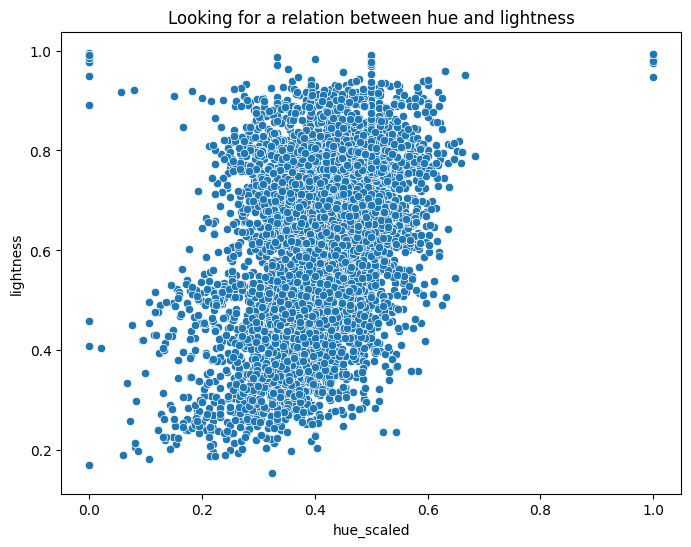

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=foundation, x='hue_scaled', y='lightness')
plt.title('Looking for a relation between hue and lightness')
plt.show()

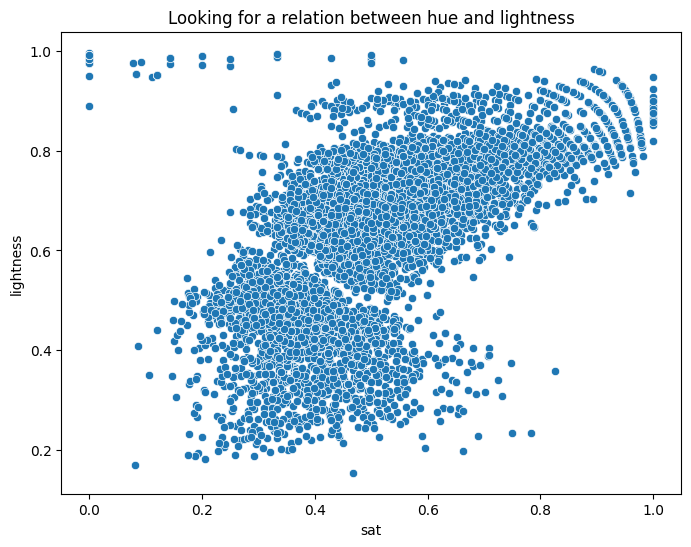

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=foundation, x='sat', y='lightness')
plt.title('Looking for a relation between hue and lightness')
plt.show()

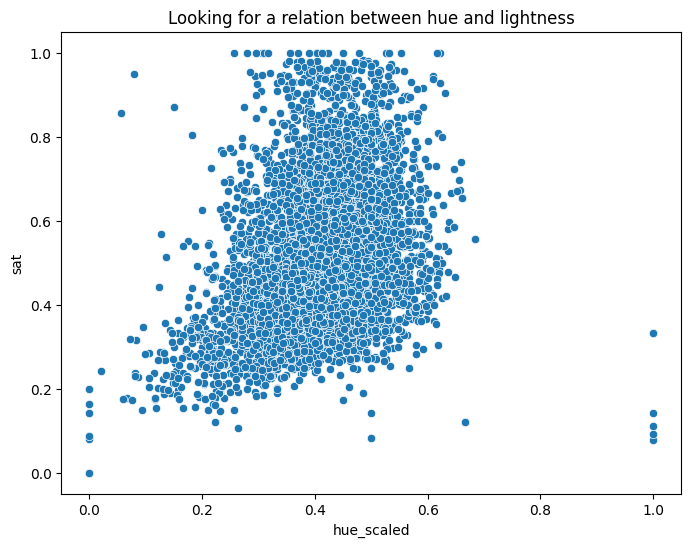

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=foundation, x='hue_scaled', y='sat')
plt.title('Looking for a relation between hue and lightness')
plt.show()

# KMeans

In [ ]:
from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species so our k = 3. 
kmeans = KMeans(n_clusters=3)
kmeans.fit(foundation_numbers)  # Compute k-means clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[0.38462976, 0.42343142, 0.36112779],
       [0.72195415, 0.79145643, 0.44595342],
       [0.48176457, 0.67736008, 0.42925713]])

In [ ]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['sat','lightness', 'hue_scaled']
cl_pos

sat  lightness  hue_scaled
0  0.384630   0.423431    0.361128
1  0.721954   0.791456    0.445953
2  0.481765   0.677360    0.429257

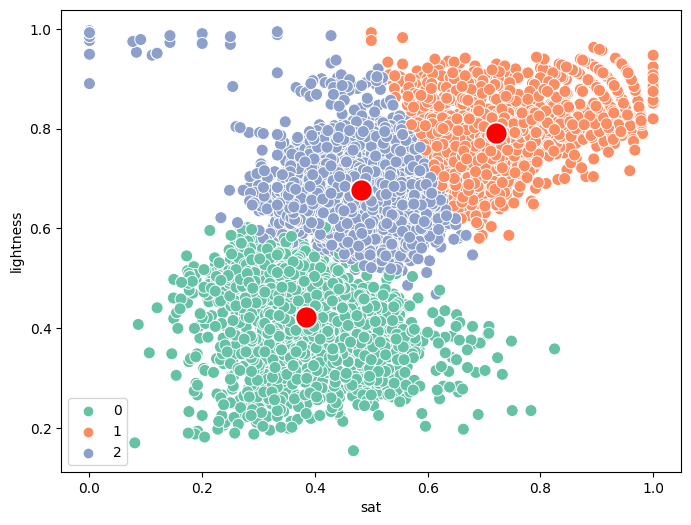

In [ ]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['sat','lightness', 'hue_scaled']
cl_pos

fig, ax = plt.subplots(figsize=(8, 6))

plot_data = pd.DataFrame(foundation_numbers)
plot_data.columns = ['sat','lightness','hue_scaled']
plot_data['cluster'] = kmeans.labels_

sns.scatterplot(data=plot_data, x='sat', y='lightness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='sat', y='lightness', color='red', s=250)
plt.show()

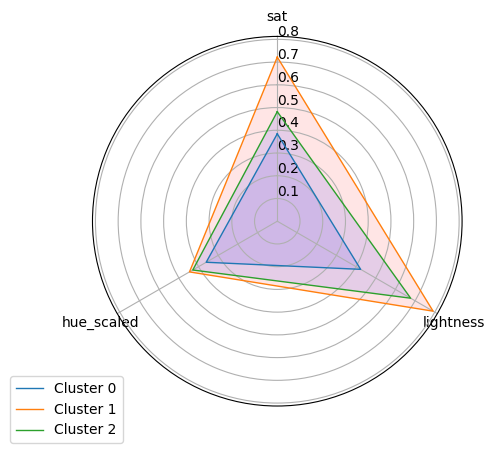

In [ ]:
from math import pi
 
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

# Checking number of clusters 

In [ ]:
#import 
from sklearn.cluster import KMeans

#calculate inertia
kmeans.inertia_

154.93386799173834

In [ ]:
#plot inertia
import matplotlib.pyplot as plt
import seaborn as sns

max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(foundation_numbers).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#import and calculate sihouette score 
from sklearn.metrics import silhouette_score
silhouette_score(foundation_numbers, kmeans.labels_)

0.8264913677088512

In [ ]:
#@title Silhouette Score Plots
max_k = 12
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(foundation_numbers).labels_
    sil_score.append(silhouette_score(foundation_numbers, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

# KMeans Distances

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

#removing the cluster column
foundation_numbers_no_cluster = foundation_numbers.copy() 
foundation_numbers_no_cluster
foundation_numbers_no_cluster.drop(["cluster"], axis=1, inplace = True)

# Calculate the distances
distances = kmeans.transform(foundation_numbers_no_cluster)

# Add the distances as a new column
foundation_numbers['distance'] = distances.min(axis=1)

In [ ]:
foundation_numbers.head(2)

sat  lightness  hue_scaled  cluster  distance
0  0.367521   0.458824    0.430233        0  0.079503
1  0.440000   0.901961    0.545455        2  0.256304

In [ ]:
#foundation drop number columns so we don't have duplictaed 
foundation.drop(['sat', 'lightness', 'hue_scaled'], axis=1, inplace=True)
foundation_clusters = pd.merge(foundation, foundation_numbers, left_index=True, right_index=True)
foundation_clusters.head(1)

index                    brand              product name specific colorspace      hex       sat  lightness  hue_scaled  cluster  distance
0      0  Anastasia Beverly Hills  Luminous Foundation  NaN     355N        RGB  #A06F4A  0.367521   0.458824    0.430233        0  0.079503

In [ ]:
foundation_clusters[foundation_clusters['cluster'] == 1].sort_values("distance").head()

index           brand                                                             product          name specific colorspace      hex       sat  lightness  hue_scaled  cluster  distance
390     390            NARS                                 Natural Radiant Longwear Foundation    Mont Blanc      NaN        RGB  #F0C5A2  0.722222   0.788235    0.448718        1  0.004253
337     337   Laura Mercier                           Flawless Fusion Ultra-Longwear Foundation         Linen      NaN        RGB  #F1C8A7  0.725490   0.800000    0.445946        1  0.009246
6550   6550  surratt beauty                                        Surreal Skin Foundation Wand  Surreal Skin        3        RGB  #EFC3A0  0.711712   0.782353    0.443038        1  0.014010
2293   2293             MAC                                Studio Waterweight SPF 30 Foundation           NaN     NC20        RGB  #EFC3A0  0.711712   0.782353    0.443038        1  0.014010
5896   5896    bareMinerals  COMPLEXION RESCUE™ Hydrating Foundation Stick with Mineral SPF 25        Vanilla       02        RGB  #EFC3A0  0.711712   0.782353    0.443038        1  0.014010

In [ ]:
foundation_clusters.columns

Index(['index', 'brand', 'product', 'name', 'specific', 'colorspace', 'hex', 'sat', 'lightness', 'hue_scaled', 'cluster', 'distance'], dtype='object')

In [ ]:
foundation_clusters.columns.str.strip()

Index(['index', 'brand', 'product', 'name', 'specific', 'colorspace', 'hex', 'sat', 'lightness', 'hue_scaled', 'cluster', 'distance'], dtype='object')

# Euclidean Distances

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

# Define the dataset and the selected point
data = foundation_numbers.drop(['cluster', 'distance'], axis=1)
product = "Pro Filt'r Soft Matte Longwear Foundation"
shade = "110"
point = foundation_clusters.loc[foundation_clusters['product'] == product, foundation_clusters.columns != 'product'] 
point = point[(point['specific'] == shade) | (point['name'] == shade)] # added parentheses around the two conditions
point_copy = point.copy()
point.drop(['index', 'brand', 'name', 'specific', 'colorspace', 'hex', 'cluster', 'distance'], axis=1, inplace=True)

cluster_label = point_copy["cluster"].values[0]

points_with_same_cluster = foundation_clusters.loc[foundation_clusters['cluster'] == cluster_label]
points_with_same_cluster.drop(['index', 'brand', 'product', 'name', 'specific', 'colorspace', 'hex', 'cluster', 'distance'], axis=1, inplace = True)

# Obtain the final positions of the centroids
centroids = kmeans.cluster_centers_

# Calculate the Euclidean distance between the selected point and each centroid
distances_centroids = euclidean_distances(point, centroids)

# Calculate the Euclidean distance between the selected point and all other points 
distances_to_all_points = euclidean_distances(point, data)

# Calculate the Euclidean distance between the selected point and all other points in the same cluster
distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)



In [ ]:
pd.set_option('max_seq_items', None)
distances_centroids_sort = np.sort(distances_centroids)
distances_centroids_sort

array([[0.45125108, 0.63371851, 0.80461791]])

In [ ]:
pd.set_option('max_seq_items', None)
np.set_printoptions(threshold=np.inf)

distances_to_all_points_sort = np.sort(distances_to_all_points)
distances_to_all_points_sort

In [ ]:
np.set_printoptions(threshold=np.inf)
distances_to_all_points_same_cluster_sort = np.sort(distances_to_all_points_same_cluster)
distances_to_all_points_same_cluster_sort

# Export CSVs 

In [ ]:
# path = "/content/drive/MyDrive/Final Project"

# foundation_clusters.to_csv(path+"/foundation_clusters_1.csv")

# Recommender

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
#foundation_clusters = pd.read_csv("/content/foundation_clusters.csv")

In [ ]:
#Recommender
product = "Power Play Foundation"
shade = "P10"

#create a point/data for the inputed foundation name and shade
point = foundation_clusters.loc[foundation_clusters['product'] == product, foundation_clusters.columns != 'product'] 
point = point[(point['specific'] == shade) | (point['name'] == shade)] 

#copy point
point_copy = point.copy()

#drop categorical information
point.drop(['index', 'brand', 'name', 'specific', 'colorspace', 'hex', 'cluster', 'distance'], axis=1, inplace=True)

#get the cluster number for the inputed foundation
cluster_label = point_copy["cluster"].values[0]

#store dataframe with only the cluster from the inputed foundation and shade (for use in final result)
foundation_clusters_input = foundation_clusters.loc[foundation_clusters['cluster'] == cluster_label]

#create a dataframe with points of the same cluster and product type / drop the none number columns to match the point dataframe
points_with_same_cluster = foundation_clusters_input.drop(['index', 'brand', 'product', 'name', 'specific', 'colorspace', 'hex', 'cluster', 'distance'], axis=1)

#calculate the euclidean distance between the selected point and all other points in the same cluster
distances_to_all_points_same_cluster = euclidean_distances(point, points_with_same_cluster)

#add euclidean distnace values to a list
ed_list = distances_to_all_points_same_cluster.tolist()[0]
 
#add list of euclidean distances to a columns in dataframe 
foundation_clusters_input = foundation_clusters_input.assign(distance_1=ed_list)

#drop the inputed value 
foundation_clusters_input = foundation_clusters_input.drop(foundation_clusters_input.loc[(foundation_clusters_input['product'] == product) & ((foundation_clusters_input['specific'] == shade) | (foundation_clusters_input['name'] == shade))].index)

#sort results but distance 
results = foundation_clusters_input.sort_values("distance_1").head(5)

#print dataframe of columns needed
results[["brand", "product", "name", "specific", "distance_1"]]

brand                                          product             name specific  distance_1
2213                  L'Oréal                   Infallible Pro-Glow Foundation    Classic Ivory      NaN    0.072753
3597  NYX Professional Makeup        Born To Glow Naturally Radiant Foundation  Light Porcelain      NaN    0.073165
1450                 COVER FX                       Pressed Mineral Foundation              NaN      P20    0.088714
863                  COVER FX                               Custom Cover Drops          P Light        1    0.095854
2135                  L'Oréal  Infallible Pro-Matte Liquid Longwear Foundation   True Alabaster      100    0.113857